# Análise de Dados de Pessoas que Morreram de Infarto

Neste notebook, foi conduzida uma análise detalhada dos dados de pessoas que morreram de infarto no Brasil. O objetivo principal foi identificar possíveis padrões e correlações entre diferentes variáveis, como idade, sexo, estado civil, escolaridade, ocupação, entre outras, a fim de compreender melhor os fatores de risco associados a essa condição de saúde.

Inicialmente, uma análise completa da base de dados foi realizada, incluindo pessoas de todas as idades. Posteriormente, foi feito um recorte para incluir apenas pessoas com menos de 60 anos, uma vez que o infarto nessa faixa etária é menos comum e pode estar relacionado a diferentes causas em comparação com pessoas mais velhas. Em seguida, foram conduzidas análises específicas para identificar as principais causas do infarto e investigar possíveis correlações com variáveis socioeconômicas e demográficas.

Foram utilizadas técnicas de visualização de dados, como gráficos de barras e análises estatísticas descritivas, para apresentar os resultados de forma clara e informativa. Além disso, foram criados mapeamentos para categorias específicas, como escolaridade e estado civil, a fim de facilitar a interpretação dos dados.

Essa análise pode fornecer insights importantes para profissionais de saúde e pesquisadores interessados em compreender melhor os fatores de risco associados ao infarto em pessoas mais jovens e direcionar estratégias de prevenção e tratamento mais eficazes.


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df_infarto = pd.read_csv('../data/bq-results-infarto-2015-2022.csv')

/var/folders/ym/vtsfljl13gj6ms14j1387nhc0000gn/T/ipykernel_12428/4018039245.py:1: DtypeWarning: Columns (57,60,61,74,86) have mixed types. Specify dtype option on import or set low_memory=False.
  df_infarto = pd.read_csv('../data/bq-results-infarto-2015-2022.csv')


In [63]:
# Estatísticas descritivas das variáveis numéricas
desc_stats = df_infarto.describe()
print(desc_stats)


                 ano  sequencial_obito  tipo_obito   naturalidade  \
count  637551.000000      5.477280e+05    637551.0  597602.000000   
mean     2018.991878      5.335531e+05         2.0     823.861811   
std         2.001935      5.023161e+05         0.0      73.167157   
min      2016.000000      1.000000e+00         2.0       4.000000   
25%      2017.000000      6.339400e+04         2.0     826.000000   
50%      2019.000000      3.812375e+05         2.0     831.000000   
75%      2021.000000      9.371635e+05         2.0     835.000000   
max      2022.000000      1.832514e+06         2.0     999.000000   

               idade           sexo       raca_cor   estado_civil  \
count  636582.000000  637551.000000  623222.000000  621570.000000   
mean       69.592710       1.407872       2.242828       2.558838   
std        14.697956       0.491599       1.420660       1.612633   
min         0.000000       0.000000       1.000000       1.000000   
25%        60.000000       1.0000

## Descrição das Variáveis

### Escolaridade
- **1:** Nenhuma
- **2:** De 1 a 3 anos
- **3:** De 4 a 7 anos
- **4:** De 8 a 11 anos
- **5:** 12 anos e mais
- **9:** Ignorado

### Situação Conjugal
- **1:** Solteiro
- **2:** Casado
- **3:** Viúvo
- **4:** Separado judicialmente/divorciado
- **5:** União estável
- **9:** Ignorado


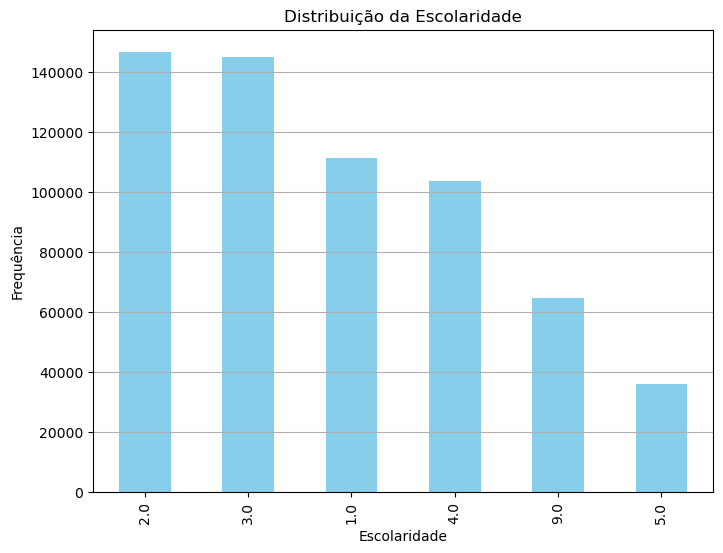

In [64]:
# Substituir os valores das variáveis categóricas pelos valores reais
escolaridade_counts = df_infarto['escolaridade'].value_counts()

# Gráfico de barras para a distribuição da escolaridade
plt.figure(figsize=(8, 6))
escolaridade_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição da Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.show()


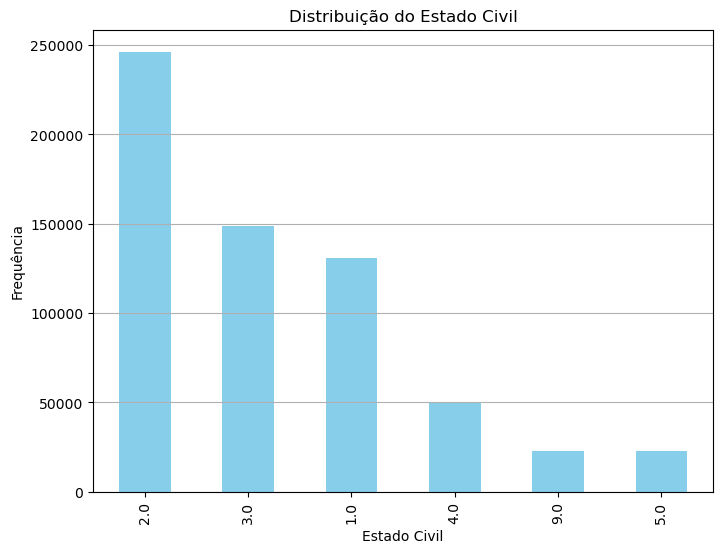

In [65]:
# Substituir os valores das variáveis categóricas pelos valores reais
estado_civil_counts = df_infarto['estado_civil'].value_counts()

# Gráfico de barras para a distribuição do estado civil
plt.figure(figsize=(8, 6))
estado_civil_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição do Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.show()


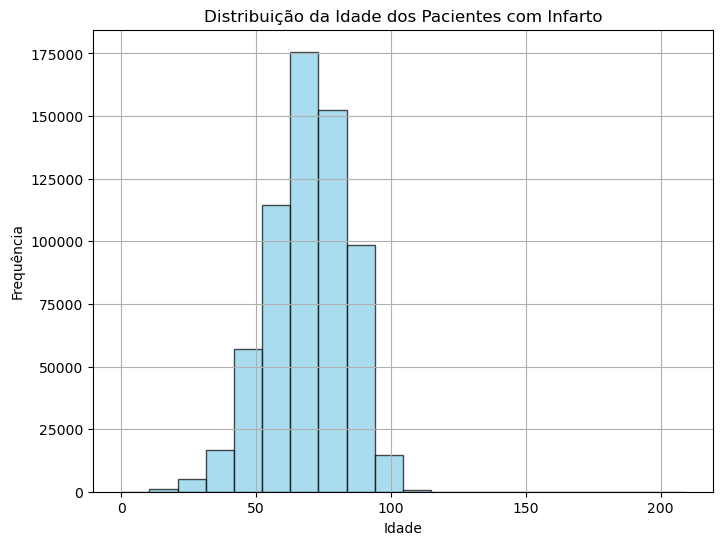

In [66]:
# Histograma da idade dos pacientes com infarto
plt.figure(figsize=(8, 6))
plt.hist(df_infarto['idade'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribuição da Idade dos Pacientes com Infarto')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

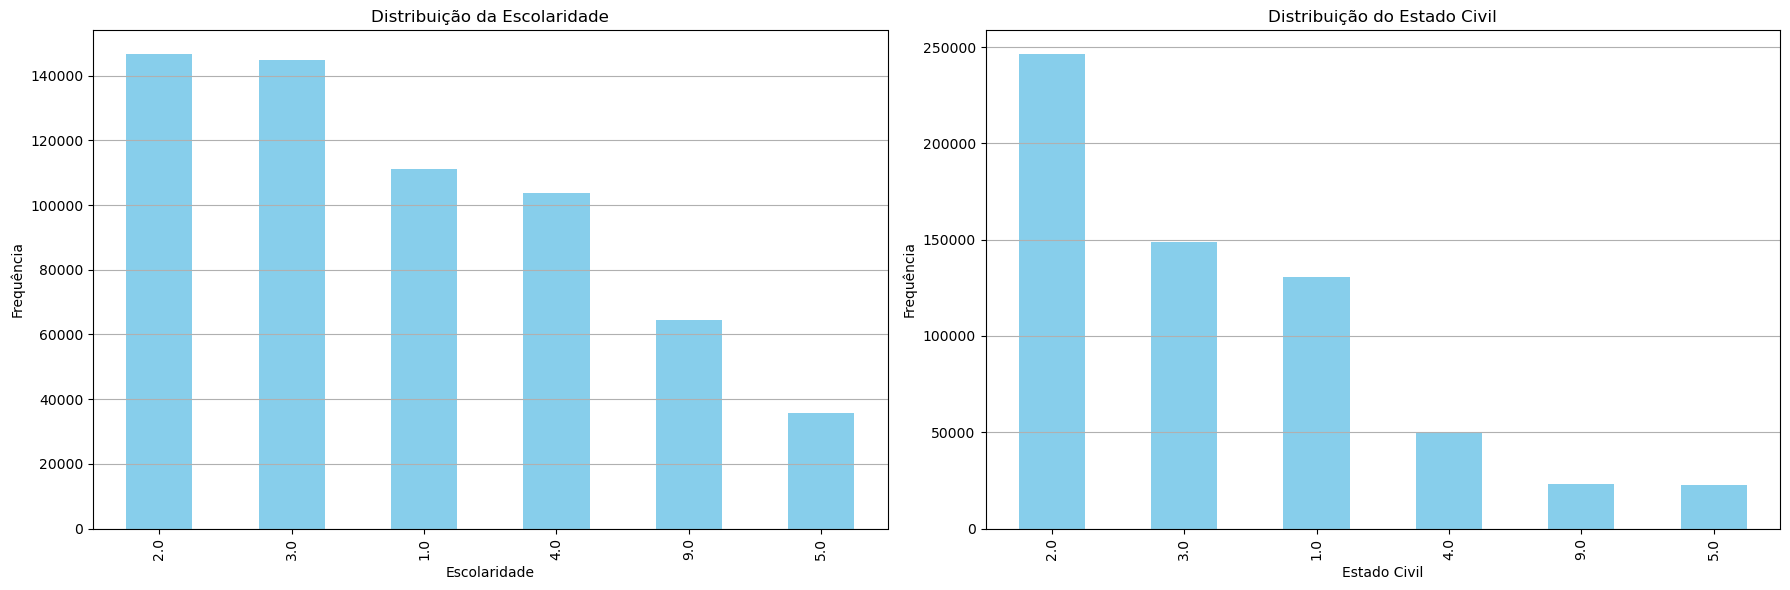

In [67]:
# Substituir os valores das variáveis categóricas pelos valores reais
escolaridade_counts = df_infarto['escolaridade'].value_counts()
estado_civil_counts = df_infarto['estado_civil'].value_counts()

# Gráficos de barra para as características socioeconômicas
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)  # Corrigido para 2 subplots
escolaridade_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição da Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Frequência')
plt.grid(axis='y')

plt.subplot(1, 2, 2)  # Corrigido para 2 subplots
estado_civil_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição do Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Frequência')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


Top 10 Ocupações mais Populares:
ocupacao
Aposentado       190245
Dona de Casa      82192
Agropecuária      31246
Agricultura       27787
Pedreiro          14957
Comerciante       10878
Não Informado      9662
Enfermeiro         9506
Estudante          9075
Desempregado       7126
Name: count, dtype: int64

Proporções em %:
ocupacao
Aposentado       29.839966
Dona de Casa     12.891831
Agropecuária      4.900941
Agricultura       4.358396
Pedreiro          2.346008
Comerciante       1.706216
Não Informado     1.515487
Enfermeiro        1.491018
Estudante         1.423416
Desempregado      1.117715
Name: count, dtype: float64


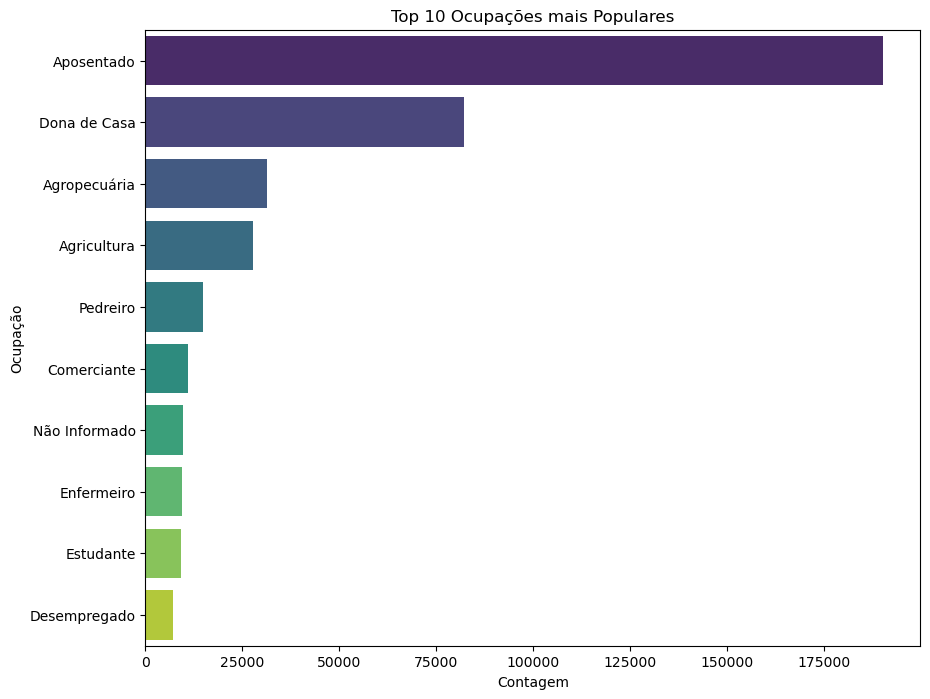

In [68]:
# Mapeamento para ocupação
mapeamento_ocupacao = {
    999992.0: 'Dona de Casa',
    999993.0: 'Aposentado',
    621005.0: 'Agropecuária',
    715210.0: 'Pedreiro',
    622020.0: 'Agricultura',
    354705.0: 'Comerciante',
    999994.0: 'Desempregado',
    512105.0: 'Enfermeiro',
    998999.0: 'Não Informado',
    141410.0: 'Estudante',
}

# Aplicar o mapeamento à coluna de ocupação
df_infarto['ocupacao'] = df_infarto['ocupacao'].map(mapeamento_ocupacao)

# Calcular as contagens para cada ocupação
ocupacao_counts = df_infarto['ocupacao'].value_counts()

# Selecionar apenas as 10 ocupações mais populares
top_10_ocupacoes = ocupacao_counts.head(10)

# Calcular as proporções em relação ao total
total_registros = len(df_infarto)
proporcoes_ocupacoes = top_10_ocupacoes / total_registros * 100

print("Top 10 Ocupações mais Populares:")
print(top_10_ocupacoes)
print("\nProporções em %:")
print(proporcoes_ocupacoes)

# Plotar gráfico de contagem para as 10 ocupações mais populares
plt.figure(figsize=(10, 8))
sns.barplot(x=top_10_ocupacoes.values, y=top_10_ocupacoes.index, palette='viridis')
plt.title('Top 10 Ocupações mais Populares')
plt.xlabel('Contagem')
plt.ylabel('Ocupação')
plt.show()

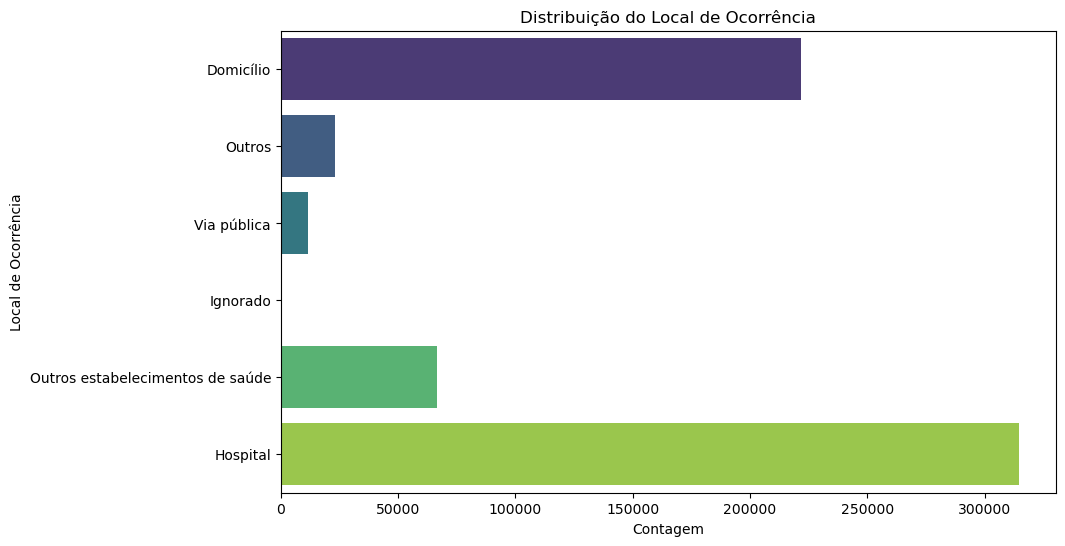

Contagem de Local de Ocorrência:
 local_ocorrencia
Hospital                            314623
Domicílio                           221575
Outros estabelecimentos de saúde     66391
Outros                               23061
Via pública                          11556
Ignorado                               327
Name: count, dtype: int64

Proporções de Local de Ocorrência (%):
 local_ocorrencia
Hospital                            49.348680
Domicílio                           34.754082
Outros estabelecimentos de saúde    10.413441
Outros                               3.617122
Via pública                          1.812561
Ignorado                             0.051290
Name: count, dtype: float64


In [69]:
# Criar um mapeamento para os valores do local de ocorrência
mapeamento_local_ocorrencia = {
    1: 'Hospital',
    2: 'Outros estabelecimentos de saúde',
    3: 'Domicílio',
    4: 'Via pública',
    5: 'Outros',
    9: 'Ignorado'
}

# Aplicar o mapeamento à coluna de local de ocorrência
df_infarto['local_ocorrencia'] = df_infarto['local_ocorrencia'].map(mapeamento_local_ocorrencia)

# Plotar gráfico de contagem para o local de ocorrência
plt.figure(figsize=(10, 6))
sns.countplot(data=df_infarto, y='local_ocorrencia', palette='viridis')
plt.title('Distribuição do Local de Ocorrência')
plt.xlabel('Contagem')
plt.ylabel('Local de Ocorrência')
plt.show()

# Calcular contagens e proporções para o local de ocorrência
contagem_local_ocorrencia = df_infarto['local_ocorrencia'].value_counts()
total_registros = len(df_infarto)
proporcoes_local_ocorrencia = contagem_local_ocorrencia / total_registros * 100

print("Contagem de Local de Ocorrência:\n", contagem_local_ocorrencia)
print("\nProporções de Local de Ocorrência (%):\n", proporcoes_local_ocorrencia)

# Recorte da base para pessoas com menos de 60 anos

In [70]:
df_infarto = df_infarto[df_infarto['idade'] < 60]

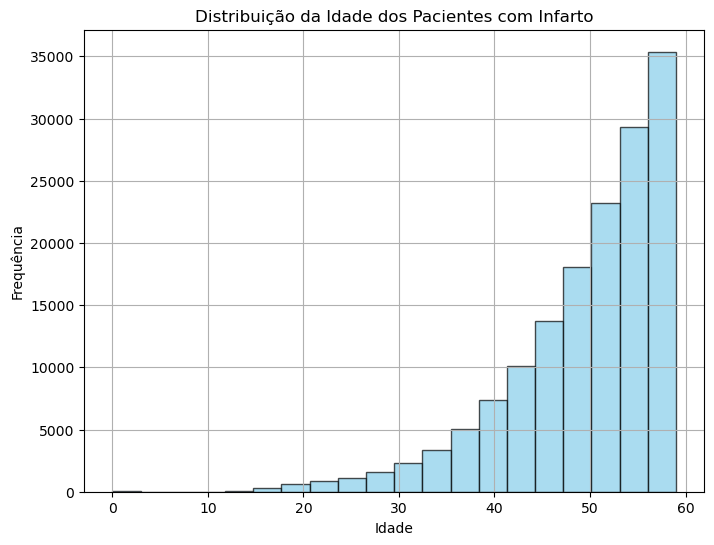

In [71]:
# Histograma da idade dos pacientes com infarto
plt.figure(figsize=(8, 6))
plt.hist(df_infarto['idade'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribuição da Idade dos Pacientes com Infarto')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

Top 10 Ocupações mais Populares:
ocupacao
Dona de Casa     16234
Aposentado       12365
Agropecuária      7697
Pedreiro          6508
Agricultura       6271
Comerciante       5431
Desempregado      4516
Enfermeiro        3700
Não Informado     3697
Estudante         2587
Name: count, dtype: int64

Proporções em %:
ocupacao
Dona de Casa     10.644827
Aposentado        8.107878
Agropecuária      5.047015
Pedreiro          4.267373
Agricultura       4.111969
Comerciante       3.561171
Desempregado      2.961195
Enfermeiro        2.426134
Não Informado     2.424167
Estudante         1.696327
Name: count, dtype: float64


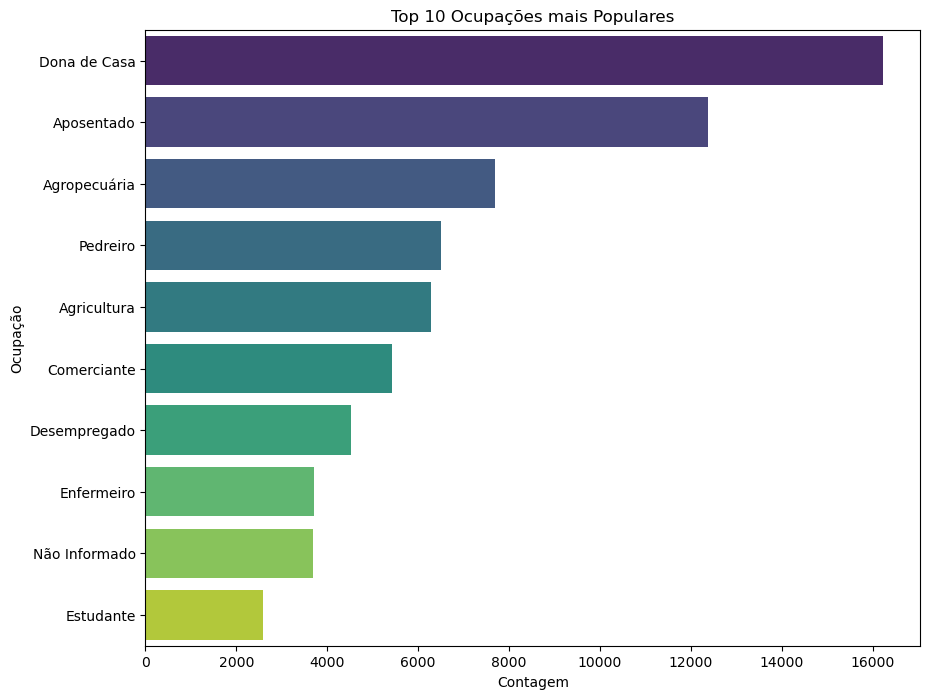

In [72]:
# Calcular as contagens para cada ocupação
ocupacao_counts = df_infarto['ocupacao'].value_counts()

# Selecionar apenas as 10 ocupações mais populares
top_10_ocupacoes = ocupacao_counts.head(10)

# Calcular as proporções em relação ao total
total_registros = len(df_infarto)
proporcoes_ocupacoes = top_10_ocupacoes / total_registros * 100

print("Top 10 Ocupações mais Populares:")
print(top_10_ocupacoes)

print("\nProporções em %:")
print(proporcoes_ocupacoes)

# Plotar gráfico de contagem para as 10 ocupações mais populares
plt.figure(figsize=(10, 8))
sns.barplot(x=top_10_ocupacoes.values, y=top_10_ocupacoes.index, palette='viridis')
plt.title('Top 10 Ocupações mais Populares')
plt.xlabel('Contagem')
plt.ylabel('Ocupação')
plt.show()


Distribuição do Local de Ocorrência:
local_ocorrencia
Hospital                            71161
Domicílio                           48582
Outros estabelecimentos de saúde    19355
Outros                               8089
Via pública                          5222
Ignorado                               88
Name: count, dtype: int64

Proporções em %:
local_ocorrencia
Hospital                            46.661115
Domicílio                           31.855796
Outros estabelecimentos de saúde    12.691304
Outros                               5.304054
Via pública                          3.424128
Ignorado                             0.057703
Name: count, dtype: float64


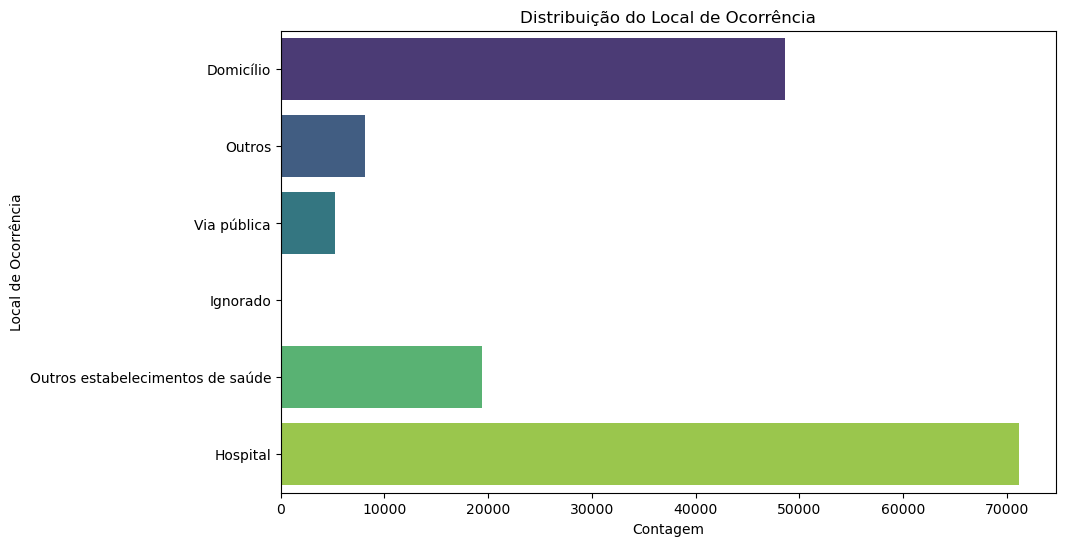

In [73]:
# Calcular as contagens para cada local de ocorrência
local_counts = df_infarto['local_ocorrencia'].value_counts()

# Calcular as proporções em relação ao total
total_registros = len(df_infarto)
proporcoes_locais = local_counts / total_registros * 100

print("Distribuição do Local de Ocorrência:")
print(local_counts)

print("\nProporções em %:")
print(proporcoes_locais)

# Plotar gráfico de contagem para o local de ocorrência
plt.figure(figsize=(10, 6))
sns.countplot(data=df_infarto, y='local_ocorrencia', palette='viridis')
plt.title('Distribuição do Local de Ocorrência')
plt.xlabel('Contagem')
plt.ylabel('Local de Ocorrência')
plt.show()


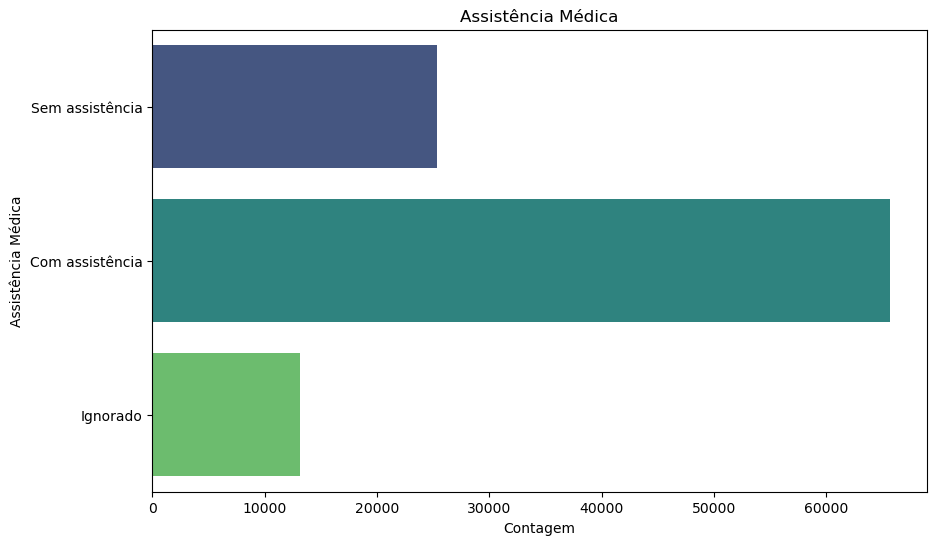

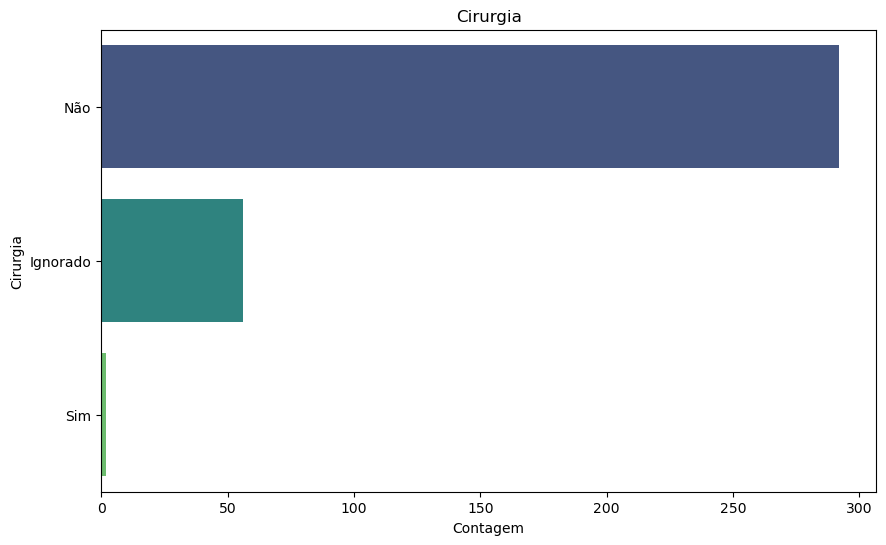

Contagem de Assistência Médica:
 assistencia_medica
Com assistência    65676
Sem assistência    25331
Ignorado           13134
Name: count, dtype: int64

Proporções de Assistência Médica (%):
 assistencia_medica
Com assistência    43.064535
Sem assistência    16.609838
Ignorado            8.612120
Name: count, dtype: float64

Contagem de Cirurgia:
 cirurgia
Não         292
Ignorado     56
Sim           2
Name: count, dtype: int64

Proporções de Cirurgia (%):
 cirurgia
Não         0.191468
Ignorado    0.036720
Sim         0.001311
Name: count, dtype: float64


In [74]:
# Mapeamento para assistência médica
mapeamento_assistencia = {
    9: 'Ignorado',
    1: 'Com assistência',
    2: 'Sem assistência'
}

# Mapeamento para cirurgia
mapeamento_cirurgia = {
    9: 'Ignorado',
    1: 'Sim',
    2: 'Não'
}

# Aplicar os mapeamentos às colunas correspondentes
df_infarto['assistencia_medica'] = df_infarto['assistencia_medica'].map(mapeamento_assistencia)
df_infarto['cirurgia'] = df_infarto['cirurgia'].map(mapeamento_cirurgia)

# Plotar gráfico de contagem para assistência médica
plt.figure(figsize=(10, 6))
sns.countplot(data=df_infarto, y='assistencia_medica', palette='viridis')
plt.title('Assistência Médica')
plt.xlabel('Contagem')
plt.ylabel('Assistência Médica')
plt.show()

# Plotar gráfico de contagem para cirurgia
plt.figure(figsize=(10, 6))
sns.countplot(data=df_infarto, y='cirurgia', palette='viridis')
plt.title('Cirurgia')
plt.xlabel('Contagem')
plt.ylabel('Cirurgia')
plt.show()

# Calculando contagens e proporções para assistência médica
contagem_assistencia_medica = df_infarto['assistencia_medica'].value_counts()
proporcoes_assistencia_medica = contagem_assistencia_medica / len(df_infarto) * 100

# Calculando contagens e proporções para cirurgia
contagem_cirurgia = df_infarto['cirurgia'].value_counts()
proporcoes_cirurgia = contagem_cirurgia / len(df_infarto) * 100

print("Contagem de Assistência Médica:\n", contagem_assistencia_medica)
print("\nProporções de Assistência Médica (%):\n", proporcoes_assistencia_medica)
print("\nContagem de Cirurgia:\n", contagem_cirurgia)
print("\nProporções de Cirurgia (%):\n", proporcoes_cirurgia)

In [75]:
# Calcular quantos casos têm causa base original diferente da causa base
diferentes = (df_infarto['causa_basica'] != df_infarto['causa_basica_original']).sum()
total_casos = len(df_infarto)

# Calcular a proporção de casos com causa base original diferente
proporcao = diferentes / total_casos

print(f"Número de casos com causa base original diferente da causa base: {diferentes}")
print(f"Total de casos: {total_casos}")
print(f"Proporção de casos com causa base original diferente: {proporcao:.2%}")


Número de casos com causa base original diferente da causa base: 6588
Total de casos: 152506
Proporção de casos com causa base original diferente: 4.32%
